In [6]:
import pandas as pd
import matplotlib.pyplot as plt

val_pred_df = pd.read_csv('val_pred.csv')
val_pred_df.head()

,image_path,label,subject,source,pred
0,data/Camera 1/train/c0/1589.jpg,0,p11,Camera 1,0
1,data/Camera 1/train/c0/1590.jpg,0,p11,Camera 1,0
2,data/Camera 1/train/c0/1592.jpg,0,p11,Camera 1,0
3,data/Camera 1/train/c0/1593.jpg,0,p11,Camera 1,0
4,data/Camera 1/train/c0/1594.jpg,0,p11,Camera 1,0


In [7]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

accuracy_score(val_pred_df['label'], val_pred_df['pred'])

0.9313929313929314

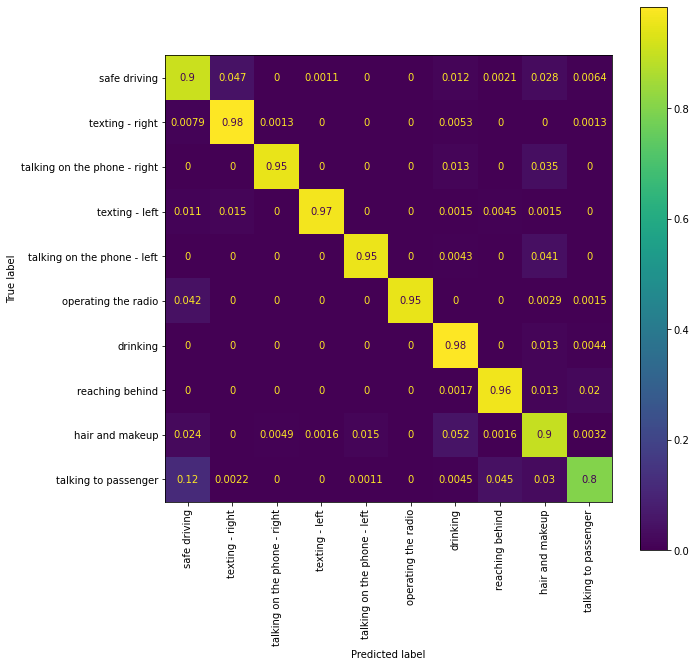

In [8]:
labels = [
    'safe driving',
    'texting - right',
    'talking on the phone - right',
    'texting - left',
    'talking on the phone - left',
    'operating the radio',
    'drinking',
    'reaching behind',
    'hair and makeup',
    'talking to passenger'
]

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(val_pred_df['label'], val_pred_df['pred'], 
                                        normalize='true', ax=ax, display_labels=labels,
                                        xticks_rotation='vertical'
                                       )
ax.grid(False)
plt.show()

In [9]:
val_pred_df['correct'] = (val_pred_df['label'] == val_pred_df['pred'])

accuracy_per_class = val_pred_df.groupby(['label'])['correct'].mean()
accuracy_per_class

label
0    0.904560
1    0.984106
2    0.952243
3    0.966767
4    0.954351
5    0.953216
6    0.982353
7    0.964587
8    0.897893
9    0.799775
Name: correct, dtype: float64

<AxesSubplot:xlabel='label', ylabel='correct'>

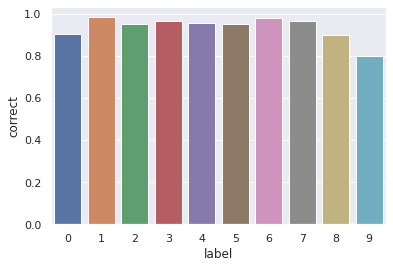

In [14]:
import seaborn as sns
sns.set()

sns.barplot(x=accuracy_per_class.index, y=accuracy_per_class)

In [15]:
accuracy_per_subject = val_pred_df.groupby(['subject'], sort=True)['correct'].mean()
subject_count = val_pred_df.groupby(['subject'], sort=True)['correct'].count()
pd.DataFrame([subject_count, accuracy_per_subject])

subject,p021,p024,p039,p042,p050,p11,p17,p27,p28,p29,p34,p35,p36,p41
correct,1237.000000,1226.000000,651.000000,591.000000,790.000000,269.000000,346.000000,335.000000,531.000000,439.000000,200.000,200.00,200.00,200.0
correct,0.940178,0.964927,0.941628,0.984772,0.907595,0.936803,0.846821,0.779104,0.977401,0.897494,0.985,0.89,0.94,0.9


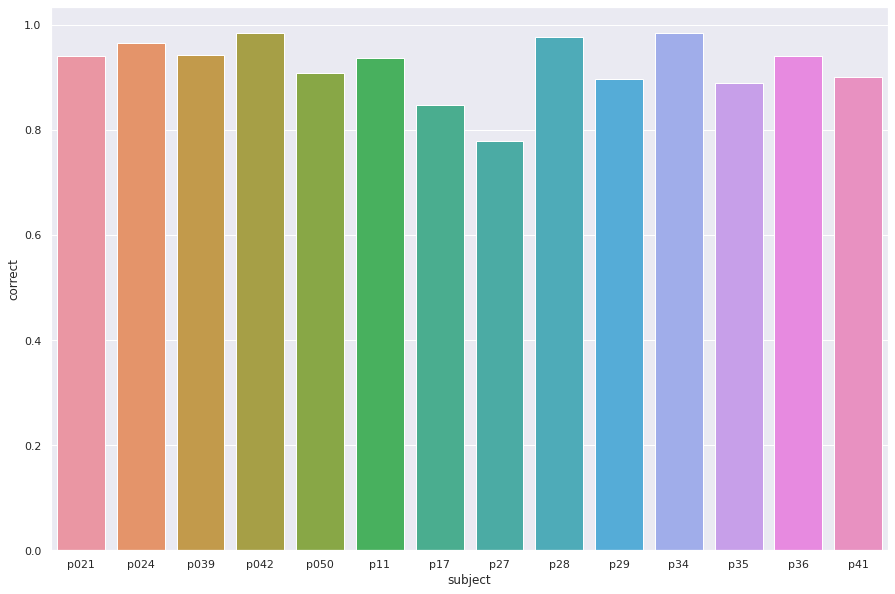

In [16]:
plt.figure(figsize=(15, 10))
sns.barplot(x=accuracy_per_subject.index, y=accuracy_per_subject)
plt.show()

In [17]:
accuracy_per_source = val_pred_df.groupby(['source'])['correct'].mean()
accuracy_per_source

source
Camera 1     0.895312
Camera 2     0.928750
StateFarm    0.947275
Name: correct, dtype: float64

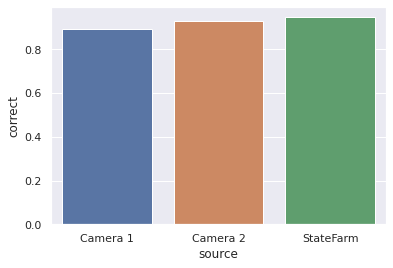

In [18]:
sns.barplot(x=accuracy_per_source.index, y=accuracy_per_source)
plt.show()

In [21]:
import glob
import shutil
import os

src_dir = '../'
#os.chdir(path)
dst_dir = "./MissClassified/"

#val_pred_df[val_pred_df['correct'] == False]
miss =val_pred_df[val_pred_df['correct'] == False]
miss.to_csv('miss.csv', index=False)
for p in miss['image_path']:
    for f in glob.iglob(os.path.join(src_dir, p)):
        shutil.copy(f, dst_dir)

In [22]:
len(miss)

495